In [1]:
import sys
import os

import pandas as pd
import numpy as np
import scipy 

import matplotlib.pyplot as plt

In [2]:
# ls /Users/colada/work_dir/Helvetas/helvetas/data/02_intermediate/

In [27]:
#script has replicates#

dir_path   = "/Users/colada/work_dir/Helvetas/helvetas/data/02_intermediate/"
file_name  = "enhanced_with_geographic_info.csv"
file_name1 = "preprocessed_helvetas.csv"


df_original = pd.read_csv("/Users/colada/work_dir/Helvetas/helvetas/data/Helvetas_H4G2020.csv", sep = ";")
df_geo = pd.read_csv("{}{}".format(dir_path, file_name ), sep = ",")
df_pre = pd.read_csv("{}{}".format(dir_path, file_name1 ), sep = ",")

In [40]:
# df_ori = df_original.drop_duplicates()


In [32]:
df = df_original.drop_duplicates()

def split_label(df):
    

    df_birth   = df.assign(**{"first_donation_year": df.apply(lambda x: int(x["first_donation"][0:4]), axis = 1),
                          "database_year" : df.apply(lambda x: int(x["andat"][0:4]), axis = 1),
                          "last_donation_year": df.apply(lambda x: int(x["last_donation"][0:4]), axis = 1)}).loc[df.gebjah != 0]
    df_label = df_birth.loc[df_birth.gebjah >=1900]
    return df_label

df_birth_cl = split_label(df)

In [50]:
True_value = []
for col in df_birth_cl.columns:
    True_value.append(len(df_birth_cl) - pd.DataFrame(df_birth_cl[col].isna().value_counts()).iloc[0, 0])


Text(0, 0.5, 'NA values')

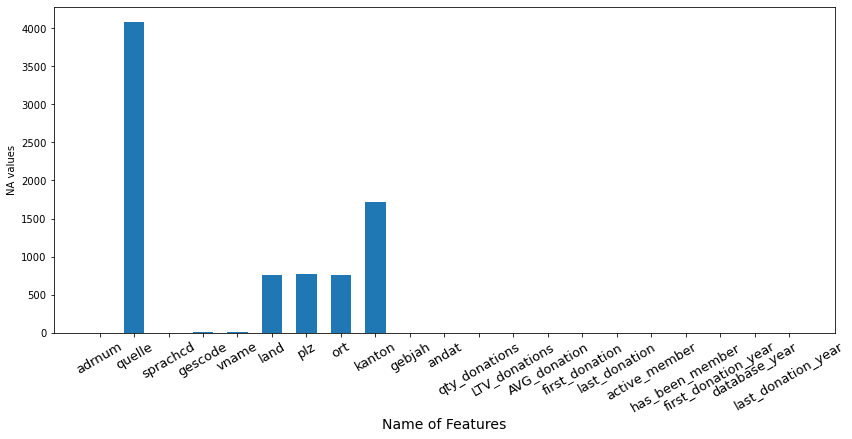

In [71]:
fig, ax = plt.subplots(figsize = (14,6))
ax.bar(range(len(True_value)), True_value, width = 0.6)
ax.set_xticks(range(len(True_value)))
ax.set_xticklabels(df_birth_cl.columns, rotation = 30, fontsize = 13)
ax.set_xlabel("Name of Features", fontsize = 14)
ax.set_ylabel("NA values")

# ax.text()


In [76]:
col_names = df_birth_cl.columns.tolist()
col_names.remove("quelle")
col_names

['adrnum',
 'sprachcd',
 'gescode',
 'vname',
 'land',
 'plz',
 'ort',
 'kanton',
 'gebjah',
 'andat',
 'qty_donations',
 'LTV_donations',
 'AVG_donation',
 'first_donation',
 'last_donation',
 'active_member',
 'has_been_member',
 'first_donation_year',
 'database_year',
 'last_donation_year']

In [95]:
def missing_data(data_missing: pd.DataFrame, verbose = True) -> pd.DataFrame:
    if verbose:
        print("{:40}: {:d}".format("*** Original number of entries", len(data_missing.index)))
    
    df = data_missing.copy(deep = True)
    
    #remove rows contains na in all columns except from column "quelle" 
    col_names = df.columns.tolist()
    col_names.remove("quelle")
    df_new = df.dropna(axis = 0, subset = col_names)
    data = df_new
    
    if verbose:
        print("{:40}: {:d}".format("*** number of entries without missing values", len(df_new.index)))

    return data
    


In [97]:
aa = missing_data(df_birth_cl) 
# aa.quelle.isna().value_counts()

*** Original number of entries          : 90762
*** number of entries without missing values: 89034


In [8]:
df = df_geo.drop_duplicates()
df_birth_    = df.assign(**{"first_donation_year": df.apply(lambda x: int(x["first_donation"][0:4]), axis = 1),
                          "database_year" : df.apply(lambda x: int(x["andat"][0:4]), axis = 1),
                          "last_donation_year": df.apply(lambda x: int(x["last_donation"][0:4]), axis = 1)}).loc[df.gebjah != 0]
df_birth_cl = df_birth.loc[df_birth.gebjah >=1900]


In [38]:
df_birth_processed = df_birth_cl.assign(**{"first_donate_age":  df_birth_cl.first_donation_year - df_birth_cl.gebjah,
                                           "last_donate_age": df_birth_cl.last_donation_year - df_birth_cl.gebjah})
df_birth_corr      = df_birth_processed.loc[df_birth_processed.gebjah<=df_birth_processed.first_donation_year]


In [39]:
df_norm = df_birth_corr.assign(**{"income_per_tax_payer": df_birth_corr["mun_income_kCHF"]/df_birth_corr["mun_n_taxpayers"],
                       "income_per_munpop": df_birth_corr["mun_income_kCHF"]/df_birth_corr["municipality_pop"]})



KeyError: 'mun_income_kCHF'

In [7]:
feature_column_norm = ["income_per_munpop", "income_per_tax_payer", "gebjah"]
feature_column = ["mun_income_kCHF", "municipality_pop", "mun_n_taxpayers" "gebjah"]




(array([9.2500e+02, 5.8032e+04, 3.1174e+04, 4.6660e+03, 1.6910e+03,
        7.9700e+02, 6.1800e+02, 1.0000e+02, 0.0000e+00, 7.0000e+00]),
 array([ 42.65      ,  65.10679592,  87.56359184, 110.02038776,
        132.47718367, 154.93397959, 177.39077551, 199.84757143,
        222.30436735, 244.76116327, 267.21795918]),
 <a list of 10 Patch objects>)

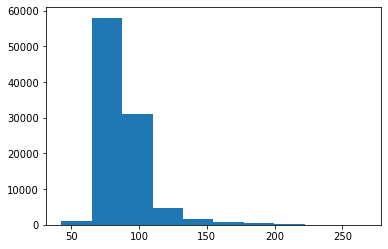

In [8]:
plt.hist(df_norm.income_per_tax_payer)

In [36]:
y = np.array(df_norm["income_per_tax_payer"])
X = np.array(df_norm[["income_per_munpop", "gebjah", "mun_n_taxpayers",]])

import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(kernel = "sigmoid", gamma='auto'))
clf.fit(X, y)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])
# reg.coef_
# reg.get_params()

NameError: name 'df_norm' is not defined

In [10]:
y1 = np.array(df_norm["mun_n_taxpayers"])
X1 = np.array(df_norm[["municipality_pop","gebjah", "mun_income_kCHF"]])

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline


reg1 = make_pipeline(StandardScaler(), linear_model.LinearRegression())
reg1.fit(X1,y1)

reg1.score(X1, y1)
# reg1.coef_


0.9977058462675494